## Feature extraction 

In [1]:
from jl_song_data import SongData 

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

##  Extract artist 

In [5]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [6]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
7076,https://tabs.ultimate-guitar.com/tab/kc-and-th...,Keep It Coming Love,1970s,Disco%%Disco,"['G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#...",00423cc2-12f1-4fd1-b592-184d05caaf41,Kc And The Sunshine Band
4801,https://tabs.ultimate-guitar.com/tab/garth-bro...,Wolves,1990s,Country,"['D', 'D/F#', 'G', 'Asus4', 'A', 'D', 'D/F#', ...",64ce634f-e62d-454e-a7c0-686395cbb3eb,Garth Brooks
9935,https://tabs.ultimate-guitar.com/tab/pointer-s...,Dare Me,1980s,Contemporary R&b,"['F#m', 'F#m', 'E', 'F#m', 'F#m', 'E', 'D', 'C...",6717dd49-f7ad-457d-8f33-488e300f61fd,Pointer Sisters
10153,https://tabs.ultimate-guitar.com/tab/rainbow/r...,Rainbow Eyes,1970s,Metal,"['Em', 'G', 'D', 'Am', 'C', 'D', 'Em', 'Em', '...",ba21e4d2-3c93-4ba8-80c6-65f64c588e76,Rainbow
3820,https://tabs.ultimate-guitar.com/tab/elvis-pre...,I Got A Woman,1950s,Rhythm And Blues%%Rock,"['E', 'A7', 'B7', 'E7', 'E', 'A7', 'E', 'A7', ...",032b2f08-6021-40e6-84f3-6e44ade2925f,Elvis Presley
4552,https://tabs.ultimate-guitar.com/tab/francis-c...,Octobre,1990s,Pop,"['D', 'G', 'D', 'G', 'Bm', 'E', 'G', 'D', 'G',...",0d72a863-6f41-4cb7-bd1d-2097315df5b4,Francis Cabrel
11151,https://tabs.ultimate-guitar.com/tab/six60/don...,Dont Forget Your Roots (ver 2),2010s,Reggae,"['F', 'C', 'G', 'Am', 'F', 'C', 'G', 'Am', 'F'...",6e06deb7-5e7e-4788-a22a-3d8c6d7d2129,Six60
138,https://tabs.ultimate-guitar.com/tab/50_cent/2...,21 Questions,2000s,Hip Hop,"['Em', 'G', 'C', 'A', 'Em', 'G', 'C', 'A', 'Em...",54718e69-d81c-4d16-913a-c16b5114b4d4,50 Cent
13544,https://tabs.ultimate-guitar.com/tab/van_morri...,Real Real Gone,1990s,Rhythm And Blues%%Rhythm And Blues,"['G', 'Em', 'C', 'D', 'G/F#', 'Am7', 'Am', 'G'...",db767542-46c5-4a08-9f51-a0172591ad51,Van Morrison
8908,https://tabs.ultimate-guitar.com/tab/my-chemic...,Helena (ver 5),2000s,Rock,"['C#m', 'E', 'B', 'A', 'C#m', 'B', 'C#m', 'E',...",5c89c1bc-dbb4-428e-8607-7735c18f6c59,My Chemical Romance


## Extract decade as numeric 

In [7]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [8]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [9]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Harmonics features 

This eval is to convert string column to array colum

In [10]:
df['chords'] = df['chords'].apply(eval)

### Cardinality (number of chords) 

In [11]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [12]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
6348,https://tabs.ultimate-guitar.com/tab/john-frus...,Anne,2000,Folk%%Folk,"[A, E, F#m, D, A, E, F#m, D, Dm, Gm/Bb, Bb/F, ...",918e3059-61ce-48ba-adac-9f04e1fbb35b,John Frusciante,73
4073,https://tabs.ultimate-guitar.com/tab/erasure/a...,A Little Respect (ver 3),1980,Electronic,"[C, Csus4, C, Csus4, C, Csus4, C, Csus4, C, Cs...",d911dc33-f9b1-49f8-9e3a-878e8bdab073,Erasure,175
7891,https://tabs.ultimate-guitar.com/tab/luis-migu...,Todo Y Nada,1990,World Music,"[G, D/F#, Em, Bm, C, C/D, G, Gsus4, G, F#m7, B...",66f7f0e0-c8cc-4260-8332-e4ca3f474b74,Luis Miguel,105
8810,https://tabs.ultimate-guitar.com/tab/mississip...,Trouble Ive Had All My Days,1980,Blues%%Blues,"[D, G, D, A, D, D, D, G, D, A, D, G, D, A, D, ...",dcb5a464-c95b-4041-9681-0f6810f5b4e1,Mississippi John Hurt,48
11597,https://tabs.ultimate-guitar.com/tab/sturgill_...,You Can Have The Crown,2010,Country,"[A, D, D, A, E, A, A, D, A, E, A, D, A, E, A, ...",4a7ea563-3227-4e2e-9546-7c7283746549,Sturgill Simpson,68
1579,https://tabs.ultimate-guitar.com/tab/bob_dylan...,Lay Lady Lay (ver 5),1960,Country,"[A, C#m, G, Bm, A, C#m, G, Bm, A, C#m, G, Bm, ...",5fe9ac84-6c9e-48f1-a612-e4516e54a294,Bob Dylan,296
998,https://tabs.ultimate-guitar.com/tab/aventura/...,Te Invito,2000,World Music,"[C, Am, F, G, C, Am, F, G, C, Am, F, G, C, Am,...",e9f51f45-24cc-4a22-ac0e-2f0c31702ac0,Aventura,70
1674,https://tabs.ultimate-guitar.com/tab/bobby_dar...,Beyond The Sea (ver 5),1950,Pop%%Pop,"[G, Em, Am7, D7, G, Em, Am7, D7, G, B7, Em, D7...",bc01bd8b-d747-4e7e-8fc4-8b2cae9fc873,Bobby Darin,89
3663,https://tabs.ultimate-guitar.com/tab/ella-hend...,Yours,2010,Rhythm And Blues,"[F, C, G, F, C, G, F, C, G, F, C, G, F, C, G, ...",5bf8b855-7f9d-4ab7-b5ac-0580fdfbb7e2,Ella Henderson,74
13274,https://tabs.ultimate-guitar.com/tab/tryo/dans...,Dans Les Nuages,2000,Reggae,"[Am, Am, Am, D, D, Am, Am, D, D, Am, D, Am, D,...",3bd16059-c0e5-4895-a2df-e22e40835711,Tryo,77


In [13]:
df['cardinality'].describe()

count    14114.000000
mean        85.595012
std         68.730613
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [14]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic%%Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop%%Pop%%Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Rhythm And Blues%%Rhythm And Blues%%Rhythm And...,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [15]:
df = df[df['cardinality'] != 0]

In [16]:
df['cardinality'].describe()

count    14043.000000
mean        86.027772
std         68.633450
min          1.000000
25%         51.000000
50%         78.000000
75%        109.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [17]:
df = df[df['cardinality'] != 1]

In [18]:
df = df[df['cardinality'] != 2]

In [19]:
df['cardinality'].describe()

count    14031.000000
mean        86.099993
std         68.618328
min          3.000000
25%         52.000000
50%         78.000000
75%        109.000000
max       2020.000000
Name: cardinality, dtype: float64

In [30]:
df['cardinality'].mode()

0    68
dtype: int64

In [25]:
import matplotlib.pyplot as plt

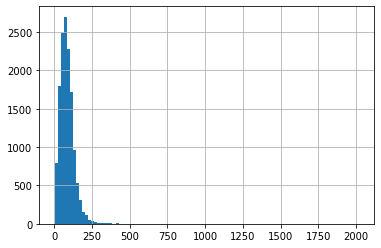

In [29]:
df['cardinality'].hist(bins=100)

## Genre (to be improved) 

In [26]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'].apply(remove_duplicate_genre_inside_cell).unique()

array(['Folk', 'Folk%%Pop', 'Electronic', 'Classical%%Pop',
       'Electronic%%Pop', 'Jazz', 'Pop', 'Rock',
       'Contemporary R&b%%Rhythm And Blues', 'Rhythm And Blues',
       'World Music', 'Reggae', 'Metal', 'Hip Hop', 'Jazz%%Pop',
       'Hip Hop%%Rhythm And Blues', 'Jazz%%World Music', 'Disco',
       'Folk%%Jazz', 'Contemporary R&b', 'Electronic%%Rock',
       'Electronic%%Pop%%Rock', 'Disco%%Pop', 'Pop%%Rhythm And Blues',
       'Pop%%Rock', 'Contemporary R&b%%Hip Hop',
       'Religious Music%%Rhythm And Blues', 'Country', 'Folk%%Rock',
       'Blues', 'Contemporary R&b%%Electronic',
       'Electronic%%Rhythm And Blues', 'Folk%%Religious Music',
       'Religious Music', 'Pop%%Religious Music',
       'Jazz%%Rhythm And Blues', 'Contemporary R&b%%Pop', 'Metal%%Rock',
       'Darkwave', 'Blues%%Rock', 'Disco%%Pop%%Rock',
       'Folk%%Rhythm And Blues', 'Folk%%Pop%%Rock',
       'Disco%%Rhythm And Blues', 'Blues%%Rhythm And Blues',
       'Rhythm And Blues%%Rock', 'Country%%

## 